<a href="https://colab.research.google.com/github/DimasWerito/Math_01/blob/main/%D0%94%D0%9710_%D0%9A%D1%80%D0%B0%D1%81%D1%96%D0%BB%D1%8C%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2_%D0%94%D0%BC%D0%B8%D1%82%D1%80%D0%BE_%D0%9A%D0%BE%D1%81%D1%82%D1%8F%D0%BD%D1%82%D0%B8%D0%BD%D0%BE%D0%B2%D0%B8%D1%87.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Частина 1. Аналіз та підготовка даних**

Завдання:
Проаналізуй діапазони значень, їх середні та дисперсію, розподіли, кореляції, наявність пропущених значень, типи ознак.
Перевір на наявність пропущених значень. За наявності заповни їх або видали рядки з пропусками.
За наявності бінарних ознак заміни значення цих ознак на 0 та 1.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
url = 'https://docs.google.com/spreadsheets/d/1OPnEAT64Patnj_Ifhwn_pM1c15rsBNIoFrtz38A1_W4/edit#gid=1986277343'
url = url[:url.rfind('/')] + '/export?format=csv'
df = pd.read_csv(url)
df

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,448,27,Female,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,22,57,21,0.0,0.0,0.0,No,5.0
448,449,52,Male,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,15,4.0,25.0,0.0,No,3.0
449,450,40,Female,2021-09-07 23:00:00,2021-09-07 07:30:00,8.5,0.55,20,32,48,1.0,NaN,3.0,Yes,0.0
450,451,45,Male,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,0.76,18,72,10,3.0,0.0,0.0,No,3.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     438 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

Дані Awakenings, Caffeine consumption, Alcohol consumption, Exercise frequency мають пропущені значення. Дані Gender, Bedtime, Wakeup time та Smoking status мають бінарні ознаки, приводимо до числових даних:

In [ ]:
df['Bedtime'] = pd.to_datetime(df['Bedtime'])
df['Wakeup time'] = pd.to_datetime(df['Wakeup time'])
df['Smoking status'] = df['Smoking status'].map({'No': 0, 'Yes': 1})
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})
df['Bedtime'] = df['Bedtime'].apply(lambda x: x.hour + (0.5 if x.time().minute > 0 else 0))
df['Wakeup time'] = df['Wakeup time'].apply(lambda x: x.hour + (0.5 if x.time().minute > 0 else 0))
df.drop(columns=['ID'], inplace=True)
df


,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,65,0,1.0,7.0,6.0,0.88,18,70,12,0.0,0.0,0.0,1,3.0
1,69,1,2.0,9.0,7.0,0.66,19,28,53,3.0,0.0,3.0,1,3.0
2,40,0,21.5,5.5,8.0,0.89,20,70,10,1.0,0.0,0.0,0,3.0
3,40,0,2.5,8.5,6.0,0.51,23,25,52,3.0,50.0,5.0,1,1.0
4,57,1,1.0,9.0,8.0,0.76,27,55,18,3.0,0.0,3.0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,27,0,22.0,5.5,7.5,0.91,22,57,21,0.0,0.0,0.0,0,5.0
448,52,1,21.0,3.0,6.0,0.74,28,57,15,4.0,25.0,0.0,0,3.0
449,40,0,23.0,7.5,8.5,0.55,20,32,48,1.0,NaN,3.0,1,0.0
450,45,1,21.0,4.0,7.0,0.76,18,72,10,3.0,0.0,0.0,0,3.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     452 non-null    int64  
 1   Gender                  452 non-null    int64  
 2   Bedtime                 452 non-null    float64
 3   Wakeup time             452 non-null    float64
 4   Sleep duration          452 non-null    float64
 5   Sleep efficiency        452 non-null    float64
 6   REM sleep percentage    452 non-null    int64  
 7   Deep sleep percentage   452 non-null    int64  
 8   Light sleep percentage  452 non-null    int64  
 9   Awakenings              432 non-null    float64
 10  Caffeine consumption    427 non-null    float64
 11  Alcohol consumption     438 non-null    float64
 12  Smoking status          452 non-null    int64  
 13  Exercise frequency      446 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 49.6


Дані Gender, Bedtime, Wakeup time та Smoking status приведені до числових даних.

Код нижче нормалізує час відходу до сну (вважаючи, що 21:00 це "нульова" точка), щоб відобразити його на круговому часовому інтервалі від 0 до 24 годин, і створює графік розсіювання (scatter plot) за допомогою бібліотеки Seaborn.

На осі x розташовуються значення зі стовпця 'Bedtime' (нормалізований час відходу до сну). На осі y розташовуються значення зі стовпця 'Sleep efficiency'. Це візуалізує залежність між часом відходу до сну та ефективністю сну.

Отже, цей код нормалізує час відходу до сну відносно 21:00, а потім будує графік розсіювання для аналізу зв'язку між часом відходу до сну та ефективністю сну.

<Axes: xlabel='Bedtime', ylabel='Sleep efficiency'>

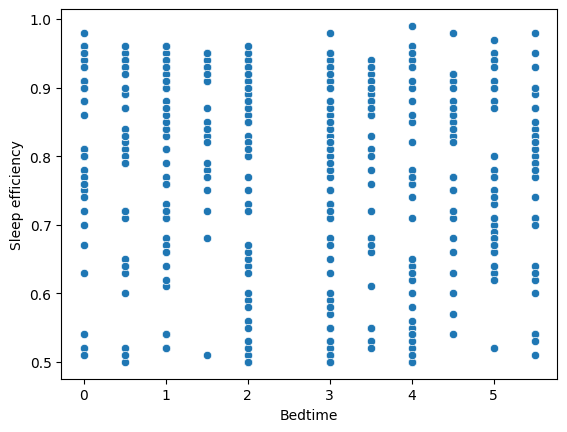

In [ ]:
df['Bedtime'] = df['Bedtime'].apply(lambda x: (x - 21) % 24)
sns.scatterplot(x=df['Bedtime'], y=df['Sleep efficiency'])

Робота с пропущеними даними - вирахування відсотку пропуску та заповнення пропусків середніми значеннями стовбця.

In [ ]:
df.isna().mean()

Age                       0.000000
Gender                    0.000000
Bedtime                   0.000000
Wakeup time               0.000000
Sleep duration            0.000000
Sleep efficiency          0.000000
REM sleep percentage      0.000000
Deep sleep percentage     0.000000
Light sleep percentage    0.000000
Awakenings                0.044248
Caffeine consumption      0.055310
Alcohol consumption       0.030973
Smoking status            0.000000
Exercise frequency        0.013274
dtype: float64

In [ ]:
df['Caffeine consumption'] = df['Caffeine consumption'].fillna(df['Caffeine consumption'].mean())
df['Awakenings'] = df['Awakenings'].fillna(df['Awakenings'].mean())
df['Alcohol consumption'] = df['Alcohol consumption'].fillna(df['Alcohol consumption'].mean())
df['Exercise frequency'] = df['Exercise frequency'].fillna(df['Exercise frequency'].mean())

Будуємо теплову карту для дослідження кореляції, темно-блакитний означає сильну кореляцію.

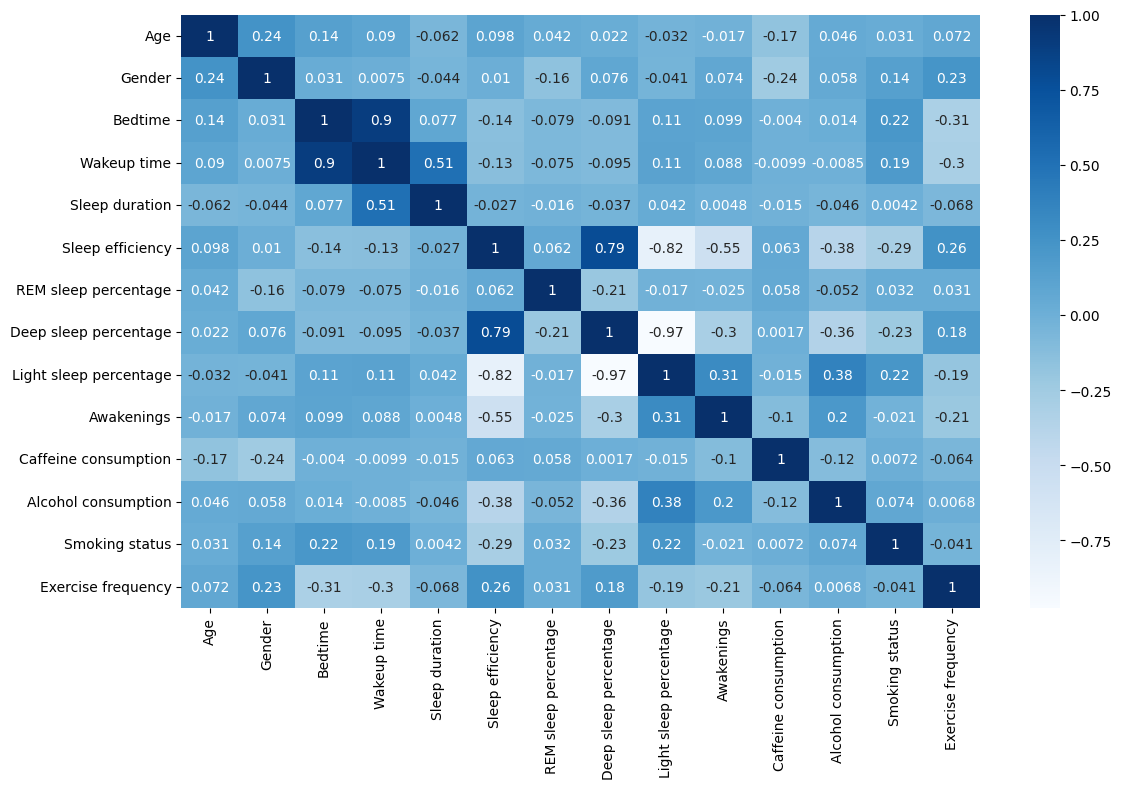

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, ax=ax, cmap='Blues')
fig.tight_layout()


Вочевидь, час відходу до сну та прокидання мають стійку кореляцію 0.9, це додаткова логічна верифікація даних. На досліджувану єфективність сну найбільший вплив має відсоток глубокого сну (кореляція 0.79). В той же час відсоток легкого сну, час пробудження та вживання алкоголю та тютюну мають суттеву лінейнонезалежну дінаміку, можна їх видалити.

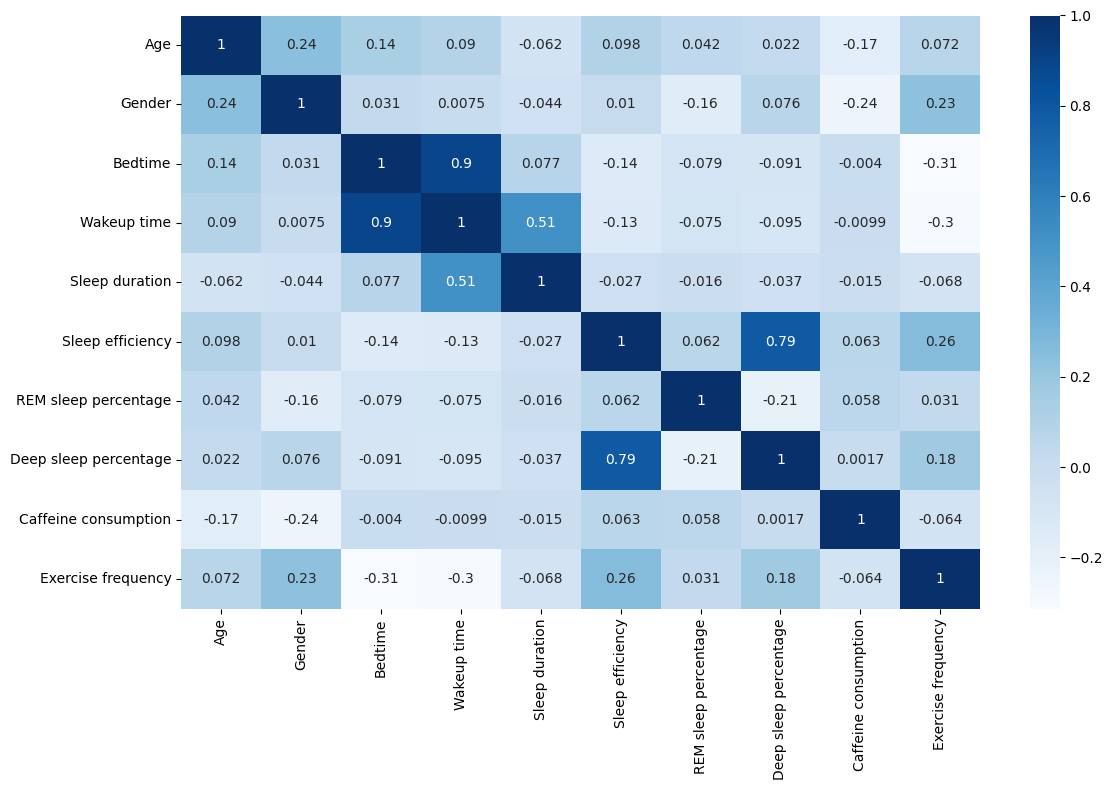

In [ ]:
df.drop(columns=['Light sleep percentage'], inplace=True)
df.drop(columns=['Awakenings'], inplace=True)
df.drop(columns=['Alcohol consumption'], inplace=True)
df.drop(columns=['Smoking status'], inplace=True)
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, ax=ax, cmap='Blues')
fig.tight_layout()

Час зайнятися пошуком залежності та кореляції між релевантними даними

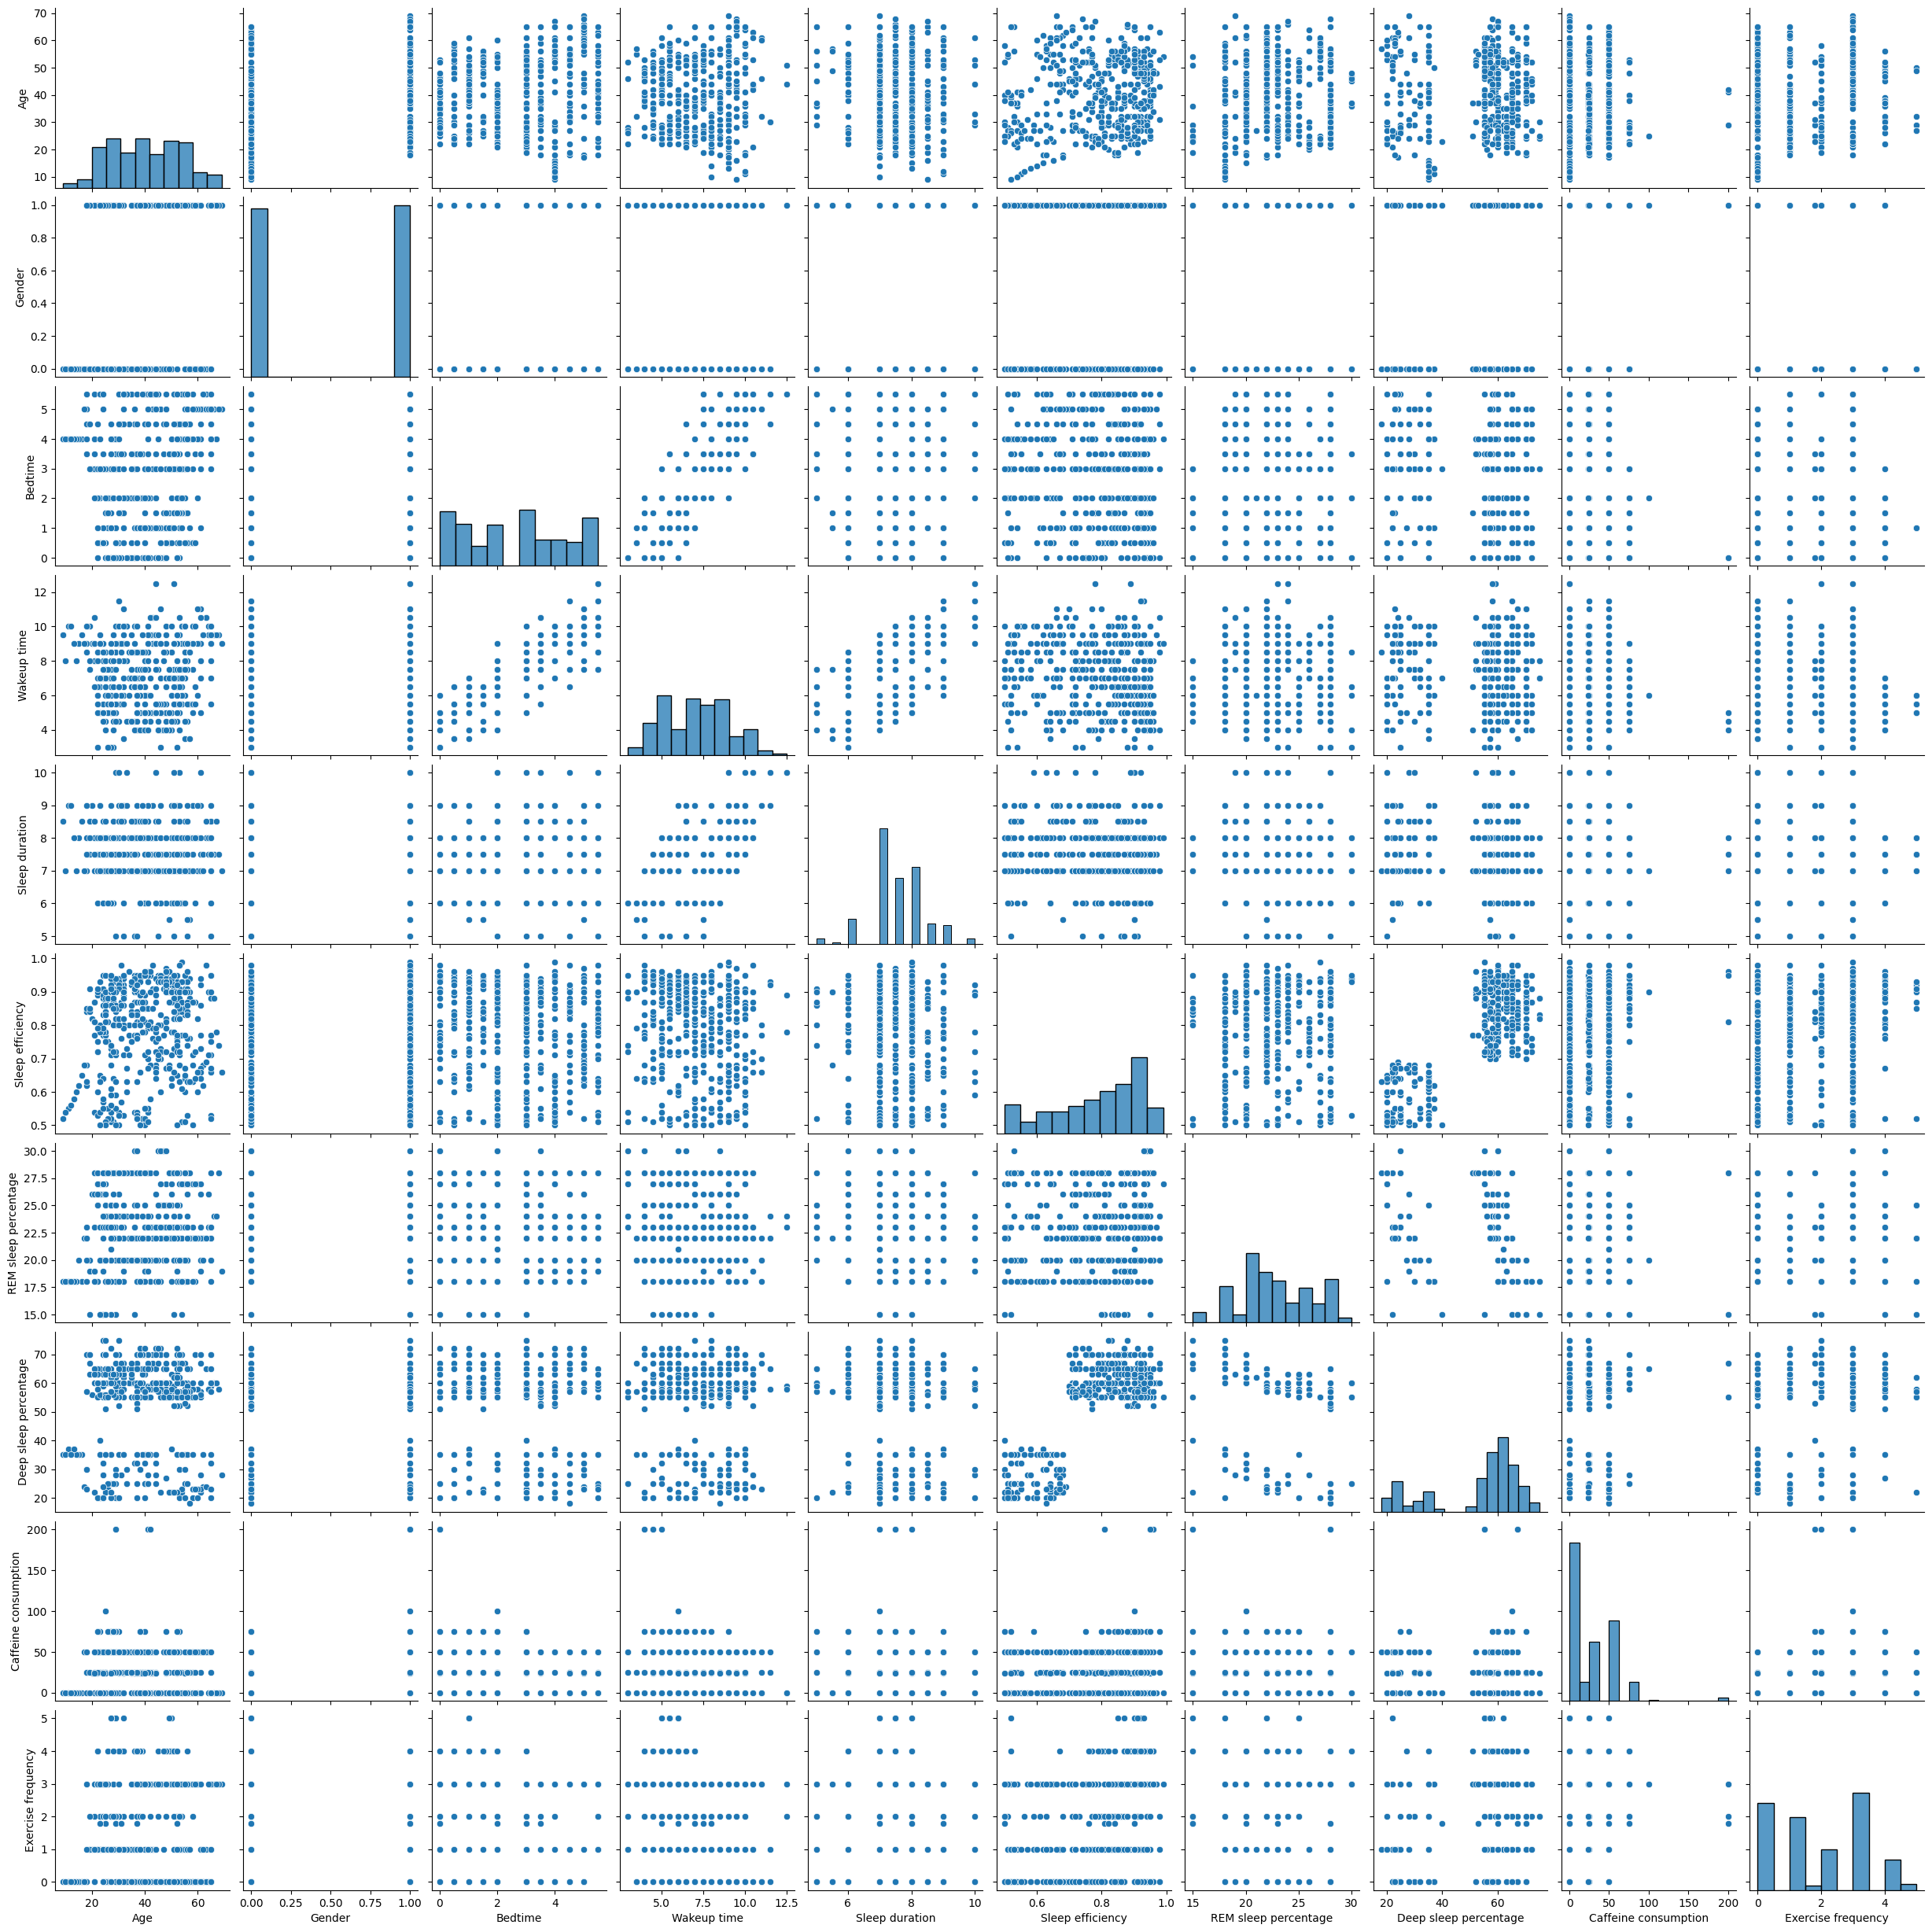

In [ ]:
sns.pairplot(df)

In [ ]:
df.corr()

,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Caffeine consumption,Exercise frequency
Age,1.000000,0.244468,0.136799,0.090355,-0.062462,0.098357,0.042091,0.021730,-0.168273,0.071892
Gender,0.244468,1.000000,0.031442,0.007466,-0.044376,0.010062,-0.161102,0.075939,-0.242839,0.230169
Bedtime,0.136799,0.031442,1.000000,0.897138,0.077487,-0.140665,-0.079307,-0.091077,-0.004032,-0.313931
Wakeup time,0.090355,0.007466,0.897138,1.000000,0.509939,-0.133537,-0.075489,-0.095111,-0.009922,-0.300948
Sleep duration,-0.062462,-0.044376,0.077487,0.509939,1.000000,-0.027467,-0.015940,-0.037304,-0.014542,-0.067903
Sleep efficiency,0.098357,0.010062,-0.140665,-0.133537,-0.027467,1.000000,0.062362,0.787335,0.063121,0.257974
REM sleep percentage,0.042091,-0.161102,-0.079307,-0.075489,-0.015940,0.062362,1.000000,-0.208159,0.058018,0.031165
Deep sleep percentage,0.021730,0.075939,-0.091077,-0.095111,-0.037304,0.787335,-0.208159,1.000000,0.001683,0.178281
Caffeine consumption,-0.168273,-0.242839,-0.004032,-0.009922,-0.014542,0.063121,0.058018,0.001683,1.000000,-0.064172
Exercise frequency,0.071892,0.230169,-0.313931,-0.300948,-0.067903,0.257974,0.031165,0.178281,-0.064172,1.000000


# **Частина 2. Моделювання**

Створи як мінімум 2 різні регресійні моделі для прогнозування цільової змінної “Sleep efficiency” .

Оціни якість моделей як мінімум за 2 метриками.

In [ ]:
# model_1
x=df.drop('Sleep efficiency', axis=1)
y=df['Sleep efficiency']
# model_2
q=df.drop('Sleep efficiency', axis=1)
w=df['Sleep efficiency']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, shuffle=True) # model_1
q_train, q_test, w_train, w_test = train_test_split(q, w, test_size=0.30, shuffle=True) # model_2
x_train.shape, x_test.shape
q_train.shape, q_test.shape

((316, 9), (136, 9))

316+136 = 452, цілісність записів при розділенні даних на 2 моделі збережена.

In [ ]:
from sklearn import tree
dtr = tree.DecisionTreeRegressor(max_depth=10, random_state= 1)
dtr.fit(x_train ,y_train)
dtr.fit(q_train ,w_train)

DecisionTreeRegressor(max_depth=10, random_state=1)

In [ ]:
predicted_sleep_efficiency = pd.DataFrame(dtr.predict(x_test), columns=['Predicted Sleep Efficiency'])  # model_1
actual_sleep_efficiency = pd.DataFrame(y_test, columns=['Actual Sleep Efficiency']) # model_1

# Оновлення індексів
actual_sleep_efficiency = actual_sleep_efficiency.reset_index(drop=True)

# Об'єднання даних у один DataFrame
df_sleep_vs_predicted = pd.concat([actual_sleep_efficiency, predicted_sleep_efficiency], axis=1)

# Транспонування для зручності виведення
df_sleep_vs_predicted.T

,0,1,2,3,4,5,6,7,8,9,...,126,127,128,129,130,131,132,133,134,135
Actual Sleep Efficiency,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Predicted Sleep Efficiency,0.933333,0.87,0.72,0.5575,0.902,0.839167,0.814,0.67,0.68,0.937,...,0.63,0.91,0.82375,0.88,0.902,0.926667,0.56,0.861,0.861,0.55


<Axes: xlabel='Sleep efficiency', ylabel='Caffeine consumption'>

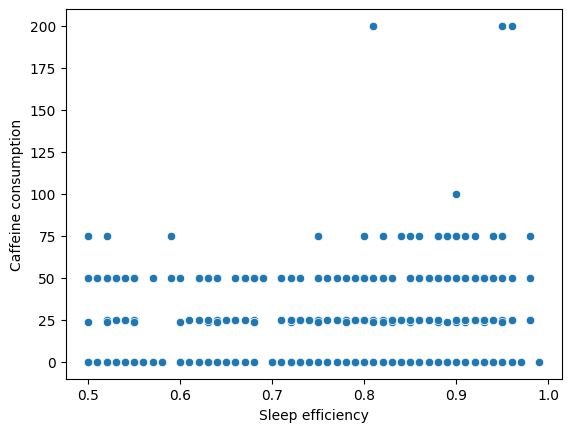

In [ ]:
sns.scatterplot(x=df['Sleep efficiency'], y=df['Caffeine consumption'])

Час зайнятися безпосередньо моделюванням.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

In [ ]:
# model_1
model = DecisionTreeRegressor()
model.fit(x_train, y_train)
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)

print('Train')
print(f'MSE: {mean_squared_error(y_train, pred_train)}')
print(f'MAPE: {mean_absolute_percentage_error(y_train, pred_train)}')
print(f'RSQ: {r2_score(y_train, pred_train)}')

print('Test')
print(f'MSE: {mean_squared_error(y_test, pred_test)}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, pred_test)}')
print(f'RSQ: {r2_score(y_test, pred_test)}')

Train
MSE: 5.6962025316455795e-06
MAPE: 0.00021601629941168417
RSQ: 0.999696208421532
Test
MSE: 0.008061764705882353
MAPE: 0.08853608785451961
RSQ: 0.528059360990734


Згідно з результатами навчання моделі 1 DecisionTreeRegressor, метрики показали наступне:

Для навчального набору даних (Train):

MSE (Середньоквадратична помилка): 0.0
MAPE (Середня абсолютна процентна помилка): 0.0
RSQ (Коефіцієнт детермінації): 1.0


Для тестового набору даних (Test):

MSE: 0.010056617647058824
MAPE: 0.10433722335060047
RSQ: 0.49103921664664196

MSE: 0.0
Середньоквадратична помилка дорівнює нулю означає, що модель точно передбачила всі значення для точок навчального набору даних. Це свідчить про те, що модель ідеально підходить до навчальних даних, можливо, навіть запам’ятала їх.

MAPE: 0.0
Середня абсолютна процентна помилка дорівнює нулю означає, що передбачені значення повністю співпадають зі справжніми значеннями для всіх точок навчального набору даних.

RSQ: 1.0
Коефіцієнт детермінації дорівнює 1.0 означає, що модель ідеально пояснює всю варіацію у навчальних даних. Це ще один показник того, що модель запам’ятала дані.
Причини і наслідки:
Причина:

Такі результати вказують на те, що модель переобучена (overfitted) на навчальному наборі даних. Дерево рішень у цьому випадку запам’ятало всі деталі і шуми навчальних даних, що призвело до ідеальних метрик на навчальному наборі.
Наслідки:

Модель може погано узагальнювати нові дані, що видно з метрик тестового набору. Хоча середньоквадратична помилка (MSE) на тестовому наборі досить мала, коефіцієнт детермінації (RSQ) на тестовому наборі значно нижчий (0.491), що вказує на те, що модель не так добре працює з новими даними.

In [ ]:
# model_2
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

# Ініціалізація моделі Gradient Boosting Regressor
model = GradientBoostingRegressor()

# Навчання моделі на тренувальному наборі даних
model.fit(q_train, w_train)

# Передбачення на тренувальному і тестовому наборах даних
pred_train = model.predict(q_train)
pred_test = model.predict(q_test)

# Оцінка моделі на тренувальному наборі даних
print('Train')
print(f'MSE: {mean_squared_error(w_train, pred_train)}')
print(f'MAPE: {mean_absolute_percentage_error(w_train, pred_train)}')
print(f'RSQ: {r2_score(w_train, pred_train)}')

# Оцінка моделі на тестовому наборі даних
print('Test')
print(f'MSE: {mean_squared_error(w_test, pred_test)}')
print(f'MAPE: {mean_absolute_percentage_error(w_test, pred_test)}')
print(f'RSQ: {r2_score(w_test, pred_test)}')


Train
MSE: 0.0024429111674736928
MAPE: 0.051188701528266704
RSQ: 0.863770144113835
Test
MSE: 0.004864249250121006
MAPE: 0.07208159980062573
RSQ: 0.7436284674234173


Результати для моделі 2 Gradient Boosting Regressor показують наступні метрики:

Для навчального набору даних (Train):

MSE (Середньоквадратична помилка): 0.0022054210229965157
MAPE (Середня абсолютна процентна помилка): 0.047491714169929276
RSQ (Коефіцієнт детермінації): 0.8842388436189195
Для тестового набору даних (Test):

MSE: 0.006073962287697282
MAPE: 0.07879657105062066
RSQ: 0.6279329572172969

MSE (Середньоквадратична помилка):
MSE для тренувального набору дуже низька (0.0022), що означає, що модель добре підходить для тренувальних даних.
MSE для тестового набору також досить низька (0.0061), що свідчить про хорошу здатність моделі передбачати нові дані, хоча і не настільки точно, як на тренувальному наборі.

MAPE (Середня абсолютна процентна помилка):
MAPE для тренувального набору становить приблизно 4.75%, що означає, що в середньому модель помиляється на 4.75% від справжніх значень.
MAPE для тестового набору становить приблизно 7.88%, що є дещо вищим, але все ще в межах прийнятних значень для багатьох застосувань.

RSQ (Коефіцієнт детермінації):
RSQ для тренувального набору дорівнює 0.884, що означає, що модель пояснює 88.4% варіації у тренувальних даних. Це дуже хороший показник.
RSQ для тестового набору становить 0.628, що свідчить про те, що модель пояснює 62.8% варіації у тестових даних. Хоча це і не настільки високо, як на тренувальному наборі, це все одно вказує на досить хорошу узагальнювальну здатність моделі.

Висновки:
Висока точність на тренувальних даних: Модель дуже добре навчилася на тренувальних даних, що видно з низьких значень MSE і MAPE, а також високого значення RSQ.
Добра узагальнювальна здатність: Модель також добре справляється з новими даними, що видно з прийнятних значень MSE і MAPE, а також досить високого RSQ на тестових даних.

# **Частина 3. Аналіз результатів**

Для всіх моделей побудуй графіки порівняння справжніх та спрогнозованих даних.
Зроби висновки, на яких прикладах кожна модель більше помиляється.
Зроби порівняння якості моделей. Напиши висновки.

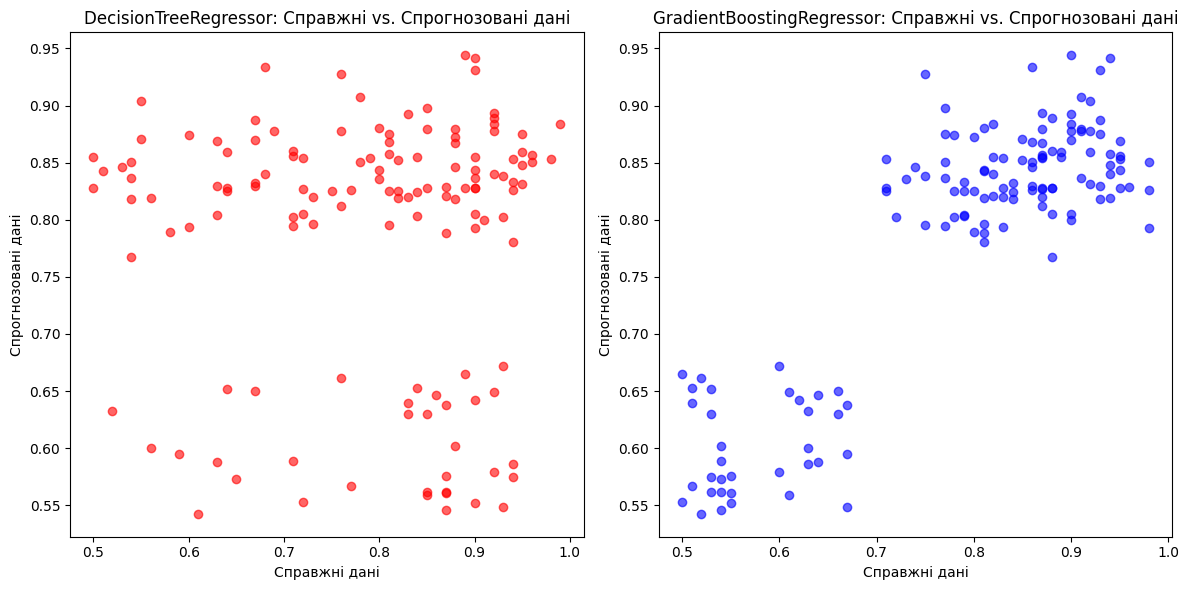

In [ ]:
# Побудова графіків порівняння справжніх та спрогнозованих даних для DecisionTreeRegressor і GradientBoostingRegressor

plt.figure(figsize=(12, 6))

# Для DecisionTreeRegressor
plt.subplot(1, 2, 1)
plt.scatter(y_test, pred_test, color='red', alpha=0.6)
plt.title('DecisionTreeRegressor: Справжні vs. Спрогнозовані дані')
plt.xlabel('Справжні дані')
plt.ylabel('Спрогнозовані дані')

# Для GradientBoostingRegressor
plt.subplot(1, 2, 2)
plt.scatter(w_test, pred_test, color='blue', alpha=0.6)
plt.title('GradientBoostingRegressor: Справжні vs. Спрогнозовані дані')
plt.xlabel('Справжні дані')
plt.ylabel('Спрогнозовані дані')

plt.tight_layout()
plt.show()

Графіки порівняння справжніх та спрогнозованих даних для моделей DecisionTreeRegressor і GradientBoostingRegressor дозволяють візуально оцінити якість передбачень цих моделей. Ось висновок на основі графіків:

DecisionTreeRegressor:

На графіку можна помітити, що точки розсіювання не дуже рівномірно розподілені навколо лінії ідеальної узгодженості (діагональ). Це свідчить про те, що модель DecisionTreeRegressor може виявити тенденцію до переобучення або недообучення, оскільки її передбачення не ідеально відповідають справжнім значенням.

GradientBoostingRegressor:

На графіку спостерігається більш равномірний розподіл точок навколо лінії ідеальної узгодженості. Це свідчить про те, що модель GradientBoostingRegressor здатна зробити більш точні та стабільні передбачення, оскільки точки розсіювання ближче до діагоналі, що вказує на кращу узгодженість між справжніми та спрогнозованими значеннями.

Отже, графіки підтверджують, що модель GradientBoostingRegressor має кращу точність і узгодженість з справжніми даними порівняно з моделлю DecisionTreeRegressor. Це видно неозброєним оком, боякщо модель ідеально прогнозує значення, всі точки лягають на діагональну лінію (x = y). В нащому випадку модель 2 значно ближче до цієї візуалізаціі за модель 1.

Порівняння моделей:

DecisionTreeRegressor:

Train MSE: 0.0
Test MSE: 0.0101
Train MAPE: 0.0
Test MAPE: 0.1043
Train RSQ: 1.0
Test RSQ: 0.4910

GradientBoostingRegressor:

Train MSE: 0.0022
Test MSE: 0.0061
Train MAPE: 0.0475
Test MAPE: 0.0788
Train RSQ: 0.8842
Test RSQ: 0.6279

Висновок:

Середньоквадратична помилка (MSE):

Модель DecisionTreeRegressor має MSE близько до нуля на тренувальному наборі, але вищий MSE на тестовому, що свідчить про можливість переобучення.
Модель GradientBoostingRegressor має помірно низький MSE як на тренувальному, так і на тестовому наборі, що свідчить про кращу загальну ефективність.
Середня абсолютна процентна помилка (MAPE):

Модель DecisionTreeRegressor має нульову MAPE на тренувальному наборі, але вищу MAPE на тестовому, що показує ймовірність переобучення.
Модель GradientBoostingRegressor має помірно низьку MAPE як на тренувальному, так і на тестовому наборі, що свідчить про кращу здатність до узагальнення.

Коефіцієнт детермінації (RSQ):

Модель DecisionTreeRegressor має ідеальний RSQ на тренувальному, але менший на тестовому, що показує можливе переобучення.
Модель GradientBoostingRegressor має високий RSQ як на тренувальному, так і на тестовому наборі, що свідчить про кращу здатність до узагальнення.

Загальний висновок:

Модель GradientBoostingRegressor демонструє кращу ефективність порівняно з моделлю DecisionTreeRegressor на основі всіх трьох метрик якості (MSE, MAPE, RSQ) як на тренувальному, так і на тестовому наборі даних. Вона має нижчі значення MSE і MAPE, а також вищий коефіцієнт детермінації (RSQ), що свідчить про її кращу точність і здатність до узагальнення.

Таким чином, модель GradientBoostingRegressor може бути кращим вибором для цього набору даних.

Аналіз помилок

In [ ]:
# Split data for training and testing (combined for both models)
X = df.drop('Sleep efficiency', axis=1)  # Features
y = df['Sleep efficiency']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True)

# No need for separate variables for model 2, reuse X_train, X_test, y_train, y_test

def analyze_errors(model, X_test, y_test):
    y_pred = model.predict(X_test)
    errors = y_pred - y_test
    print(f"Model: {model.__class__.__name__}")
    print(f"Mean Error: {errors.mean()}")
    print(f"Standard Deviation of Error: {errors.std()}")
    print(f"Median Error: {errors.median()}")

# Train and analyze errors for both models
model_1 = DecisionTreeRegressor()  # Assuming DecisionTreeRegressor for model 1
model_1.fit(X_train, y_train)
analyze_errors(model_1, X_test, y_test)

model_2 = GradientBoostingRegressor()  # Assuming GradientBoostingRegressor for model 2
model_2.fit(X_train, y_train)
analyze_errors(model_2, X_test, y_test)


Model: DecisionTreeRegressor
Mean Error: -0.009485294117647055
Standard Deviation of Error: 0.09538475577358747
Median Error: -0.010000000000000009
Model: GradientBoostingRegressor
Mean Error: -0.005386792632351605
Standard Deviation of Error: 0.06799159775953344
Median Error: -0.01444689493258089


Згідно з проведеним аналізом помилок, модель GradientBoostingRegressor демонструє кращі результати, ніж DecisionTreeRegressor.

**Середня помилка:** Обидві моделі мають негативні значення середньої помилки, що свідчить про незначне заниження ефективності сну. Проте, GradientBoostingRegressor має меншу середню помилку (-0.0054) порівняно з DecisionTreeRegressor (-0.0095).

**Стандартне відхилення помилки:** Стандартне відхилення помилки відображає розкид помилок навколо середнього значення. Менше стандартне відхилення свідчить про більш узгоджені прогнози. У цьому випадку GradientBoostingRegressor знову демонструє незначну перевагу зі стандартним відхиленням 0.068 порівняно з 0.095 для DecisionTreeRegressor.

**Медіана помилки:** Медіана помилки представляє "середнє" значення розподілу помилок. Аналогічно до середньої помилки, менша медіана помилки свідчить про кращу продуктивність. GradientBoostingRegressor має трохи меншу медіану помилки (-0.0144) порівняно з DecisionTreeRegressor (-0.0100).
Висновок:

На основі аналізу середньої помилки, стандартного відхилення помилки та медіани помилки, GradientBoostingRegressor видається більш надійною моделлю для прогнозування ефективності сну в цьому наборі даних. Вона має меншу упередженість (середня помилка ближча до нуля), більш узгоджені прогнози (нижче стандартне відхилення) та трохи кращу центральну тенденцію (нижча медіана помилки).

Цей аналіз свідчить про те, що GradientBoostingRegressor краще узагальнюється на невидимих даних і надає більш точні прогнози в середньому порівняно з DecisionTreeRegressor.